In [1]:
# Importing the required libraries
import pandas as pd
from sklearn import tree


In [7]:
df= pd.read_csv('play.csv')
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No


In [ ]:
# Convert categorical data to numbers
from sklearn.preprocessing import LabelEncoder

# Initialize encoders
le_outlook = LabelEncoder()
le_temperature = LabelEncoder()
le_humidity = LabelEncoder()
le_wind = LabelEncoder()
le_play = LabelEncoder()

# Apply encoding
df['Outlook_num'] = le_outlook.fit_transform(df['Outlook'])
df['Temperature_num'] = le_temperature.fit_transform(df['Temperature'])
df['Humidity_num'] = le_humidity.fit_transform(df['Humidity'])
df['Wind_num'] = le_wind.fit_transform(df['Wind'])
df['PlayTennis_num'] = le_play.fit_transform(df['PlayTennis'])

df


,Outlook,Temperature,Humidity,Wind,PlayTennis,Outlook_num,Temperature_num,Humidity_num,Wind_num,PlayTennis_num
0,Sunny,Hot,High,Weak,No,2,1,0,1,0
1,Sunny,Hot,High,Strong,No,2,1,0,0,0
2,Overcast,Hot,High,Weak,Yes,0,1,0,1,1
3,Rainy,Mild,High,Weak,Yes,1,2,0,1,1
4,Rainy,Cool,Normal,Weak,Yes,1,0,1,1,1
5,Rainy,Cool,Normal,Strong,No,1,0,1,0,0
6,Overcast,Cool,Normal,Strong,Yes,0,0,1,0,1
7,Sunny,Mild,High,Weak,No,2,2,0,1,0


In [9]:
# Define features and label
X = df[['Outlook_num', 'Temperature_num', 'Humidity_num', 'Wind_num']]
y = df['PlayTennis_num']

print(X)
print(y)


   Outlook_num  Temperature_num  Humidity_num  Wind_num
0            2                1             0         1
1            2                1             0         0
2            0                1             0         1
3            1                2             0         1
4            1                0             1         1
5            1                0             1         0
6            0                0             1         0
7            2                2             0         1
0    0
1    0
2    1
3    1
4    1
5    0
6    1
7    0
Name: PlayTennis_num, dtype: int32


In [ ]:
# Create and train the Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import  tree


model = tree.DecisionTreeClassifier()

model = model.fit(X, y)


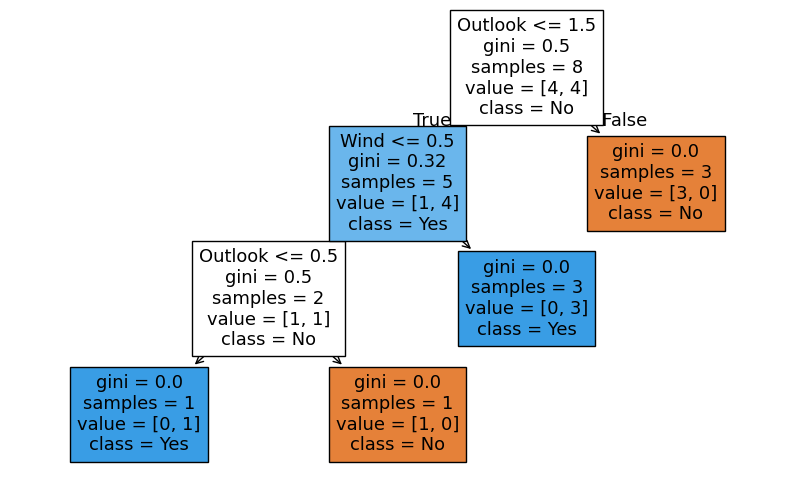

In [11]:
# Plot the decision tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
tree.plot_tree(model, feature_names=['Outlook', 'Temperature', 'Humidity', 'Wind'], class_names=le_play.classes_, filled=True)
plt.show()


In [12]:
# Example: Predict if we should play tennis with the following conditions:
# Outlook=Rainy, Temperature=Mild, Humidity=High, Wind=Strong

test = [[le_outlook.transform(['Rainy'])[0],
         le_temperature.transform(['Mild'])[0],
         le_humidity.transform(['High'])[0],
         le_wind.transform(['Strong'])[0]]]

pred = model.predict(test)
print("Play Tennis? ->", le_play.inverse_transform(pred)[0])


Play Tennis? -> No


c:\Users\Hp\miniconda3\envs\nrsc\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [13]:
# Save the trained model to a file
import joblib

# Save the model as 'decision_tree_model.pkl'
joblib.dump(model, 'decision_tree_model.pkl')
print("Model saved as 'decision_tree_model.pkl'")


Model saved as 'decision_tree_model.pkl'


In [14]:
# Load the model from the file
loaded_model = joblib.load('decision_tree_model.pkl')
print("Model loaded successfully!")


Model loaded successfully!


In [15]:
# Test: Outlook=Sunny, Temperature=Cool, Humidity=Normal, Wind=Strong

test_new = [[le_outlook.transform(['Sunny'])[0],
             le_temperature.transform(['Cool'])[0],
             le_humidity.transform(['Normal'])[0],
             le_wind.transform(['Strong'])[0]]]

prediction = loaded_model.predict(test_new)
print("Play Tennis? ->", le_play.inverse_transform(prediction)[0])


Play Tennis? -> No


c:\Users\Hp\miniconda3\envs\nrsc\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
